Importing the Dependencies

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Pre-Processing

In [42]:
#loading the data from csv file to a pandas DataFrame
raw_mail_data=pd.read_csv("spam.csv",encoding="latin-1")

In [43]:
print(raw_mail_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [44]:
# replace the null values with a null string
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [45]:
# printing the first 5 rows of the DataFrame 
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [46]:
# drop last 3 columns
mail_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [47]:
mail_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
#renaming the cells
mail_data.rename(columns={'v1':'category','v2':'text'},inplace=True)

In [49]:
mail_data.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
# checking the number of rows and columns in the DataFrame
mail_data.shape

(5572, 2)

Label Encoding

In [51]:
#label spam mail as 0 and ham mail as 1
mail_data.loc[mail_data['category']=='spam','category',]=0
mail_data.loc[mail_data['category']=='ham','category',]=1

spam=0
ham=1

In [70]:
# missing values
mail_data.isnull().sum()

category    0
text        0
dtype: int64

In [71]:
# checking for duplicate values
mail_data.duplicated().sum()

403

In [72]:
# remove duplicates
mail_data=mail_data.drop_duplicates(keep='first')

In [73]:
mail_data.duplicated().sum()

0

In [74]:
mail_data.shape

(5169, 2)

EDA

In [75]:
mail_data.head()

,category,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
mail_data['category'].value_counts()

1    4516
0     653
Name: category, dtype: int64

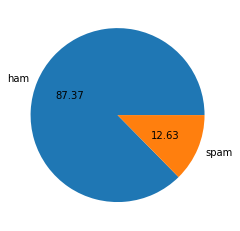

In [78]:
import matplotlib.pyplot as plt
plt.pie(mail_data['category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [52]:
# separating the data as texts and label
X=mail_data['text']
Y=mail_data['category']

In [53]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


In [54]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: category, Length: 5572, dtype: object


Splitting the data into training data and test data

In [55]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=3)

In [56]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [57]:
# transform the text data to feature vectors that can be used as input to the Logistic Regression
feature_extraction= TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
# convert Y_train and Y_test values as integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')                    

In [58]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: text, Length: 4457, dtype: object


In [59]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

Training the Model

Logistic regression

In [63]:
model=LogisticRegression()

In [64]:
# training the Logistic Regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluating the trained model

In [65]:
# prediction on training data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [66]:
print('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 0.9661207089970832


In [67]:
# prediction the test data
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [24]:
print('Accuracy on test data:',accuracy_on_test_data)

Accuracy on test data: 0.9623318385650225


Building a predictive system

In [68]:
input_mail=["Ok lar... Joking wif u oni..."]
# convert test to feature vectors
input_data_features=feature_extraction.transform(input_mail)
# making prediction
prediction=model.predict(input_data_features)
print(prediction)
if (prediction[0])==1:
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail
